In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report as c_rep
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA


from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler, NearMiss

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [3]:
cols = ['country_name','landmass','geo_zone','country_area','population','language',
           'religion','vert_bars','horiz_stripes','num_of_colors','red','green',
           'blue','gold','white','black','orange','mainhue','circles','crosses',
           'saltires','quarters','sunstars','crescent','triangle','icon','animate',
           'text','topleft','botright']

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/15.Term_Paper/flag.data.csv', sep=',')
df.columns = cols

In [5]:
df.head()

,country_name,landmass,geo_zone,country_area,population,language,religion,vert_bars,horiz_stripes,num_of_colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [6]:
# group_by_language = df.groupby(['landmass', 'religion']).count()

group_by_language = pd.pivot_table(data=df, columns='landmass', index='religion', values='country_name', aggfunc=np.count_nonzero).fillna(0)

Проведите первичный разведочный анализ данных.
a) Проверьте данные на пропуски.
b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
c) Визуализируйте распределение количества флагов по религиям.

In [7]:
religion_dict = {0: 'Catholic', 1: 'Other Christian', 2: 'Muslim', 3: 'Buddhist', 4:'Hindu', 5: 'Ethnic', 6: 'Marxist', 7: 'Others'}
landmass_dict = {1: 'N_America', 2: 'S_America', 3: 'Europe', 4: 'Africa', 5: 'Asia', 6: 'Oceania'}
language_dict = {1: 'English', 2: 'Spanish', 3: 'French', 4: 'German', 5: 'Slavic', 6: 'Other Indo-European', 7: 'Chinese', 8: 'Arabic', 9: 'Japanese/Turkish/Finnish/Magyar', 10: 'Others'}

In [8]:

group_by_language.columns = group_by_language.columns.map(landmass_dict)

group_by_language.index = group_by_language.index.map(religion_dict)

In [9]:
group_by_language

landmass,N_America,S_America,Europe,Africa,Asia,Oceania
religion,,,,,,
Catholic,9.0,13.0,14.0,2.0,0.0,2.0
Other Christian,21.0,3.0,13.0,7.0,0.0,16.0
Muslim,0.0,0.0,0.0,15.0,19.0,1.0
Buddhist,0.0,0.0,0.0,0.0,8.0,0.0
Hindu,0.0,1.0,0.0,1.0,2.0,0.0
Ethnic,0.0,0.0,0.0,26.0,0.0,1.0
Marxist,1.0,0.0,8.0,0.0,6.0,0.0
Others,0.0,0.0,0.0,1.0,3.0,0.0


In [10]:
def draw_graphs(df: pd.core.frame.DataFrame, title_str:str):
  sns.set_theme()
  num_title = 0
  if(len(df.columns)%2):
    len_cols = int((len(df.columns) + 1) // 2) 
  else:
    len_cols = int(len(df.columns) // 2)

  fig, ax = plt.subplots(nrows=len_cols, ncols=2, figsize=(17,20))
  for i in range(len_cols):
    for k in range(2):
      try:
        plt.tight_layout()
        sns.barplot(ax=ax[i, k], y=df[df.columns[num_title]], x=df.index).set_title(f'{title_str} {df.columns[num_title]}').set_fontsize(20)
        num_title+=1
      except:
        return

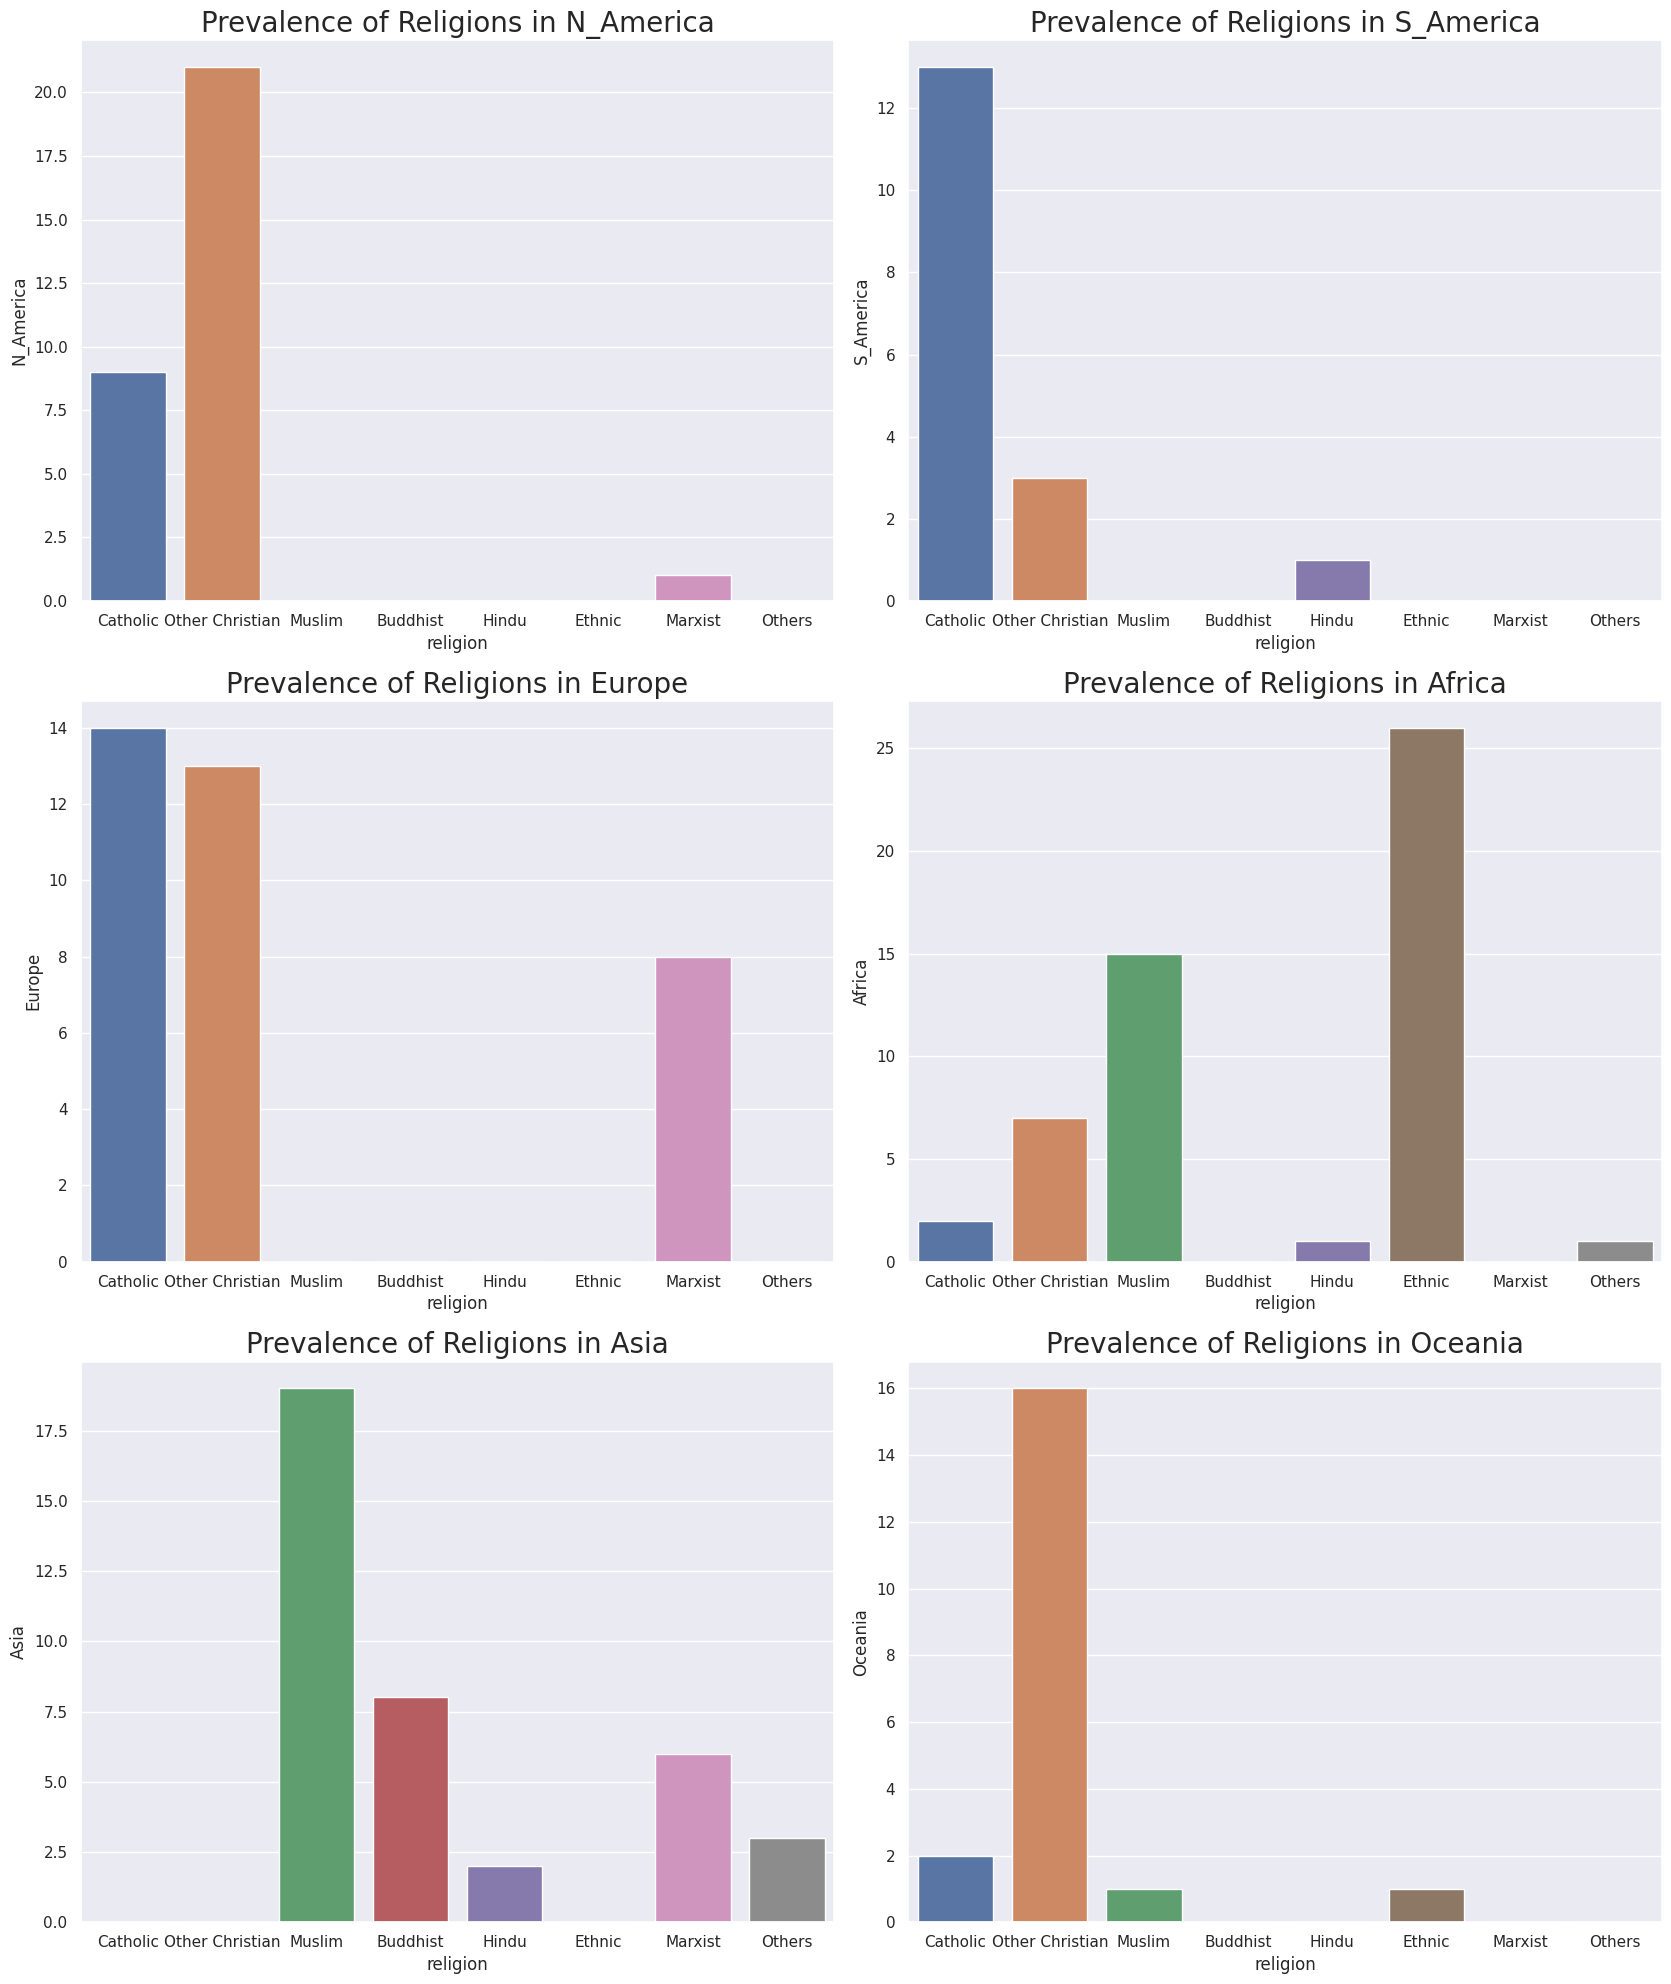

In [11]:
draw_graphs(group_by_language, 'Prevalence of Religions in')

In [12]:
# group_by_flag_color = df[['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'religion']].groupby('religion').sum()
group_by_flag_color = pd.pivot_table(data=df, columns='mainhue', index='religion', values='country_name', aggfunc=np.count_nonzero).fillna(0)

group_by_flag_color.index = group_by_flag_color.index.map(religion_dict)

In [13]:
group_by_flag_color

mainhue,black,blue,brown,gold,green,orange,red,white
religion,,,,,,,,
Catholic,1.0,9.0,0.0,6.0,3.0,0.0,15.0,6.0
Other Christian,1.0,24.0,0.0,3.0,6.0,1.0,16.0,9.0
Muslim,2.0,2.0,1.0,3.0,11.0,1.0,15.0,0.0
Buddhist,0.0,1.0,0.0,1.0,0.0,1.0,4.0,1.0
Hindu,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
Ethnic,1.0,2.0,0.0,5.0,8.0,0.0,10.0,1.0
Marxist,0.0,2.0,0.0,1.0,0.0,0.0,10.0,2.0
Others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0


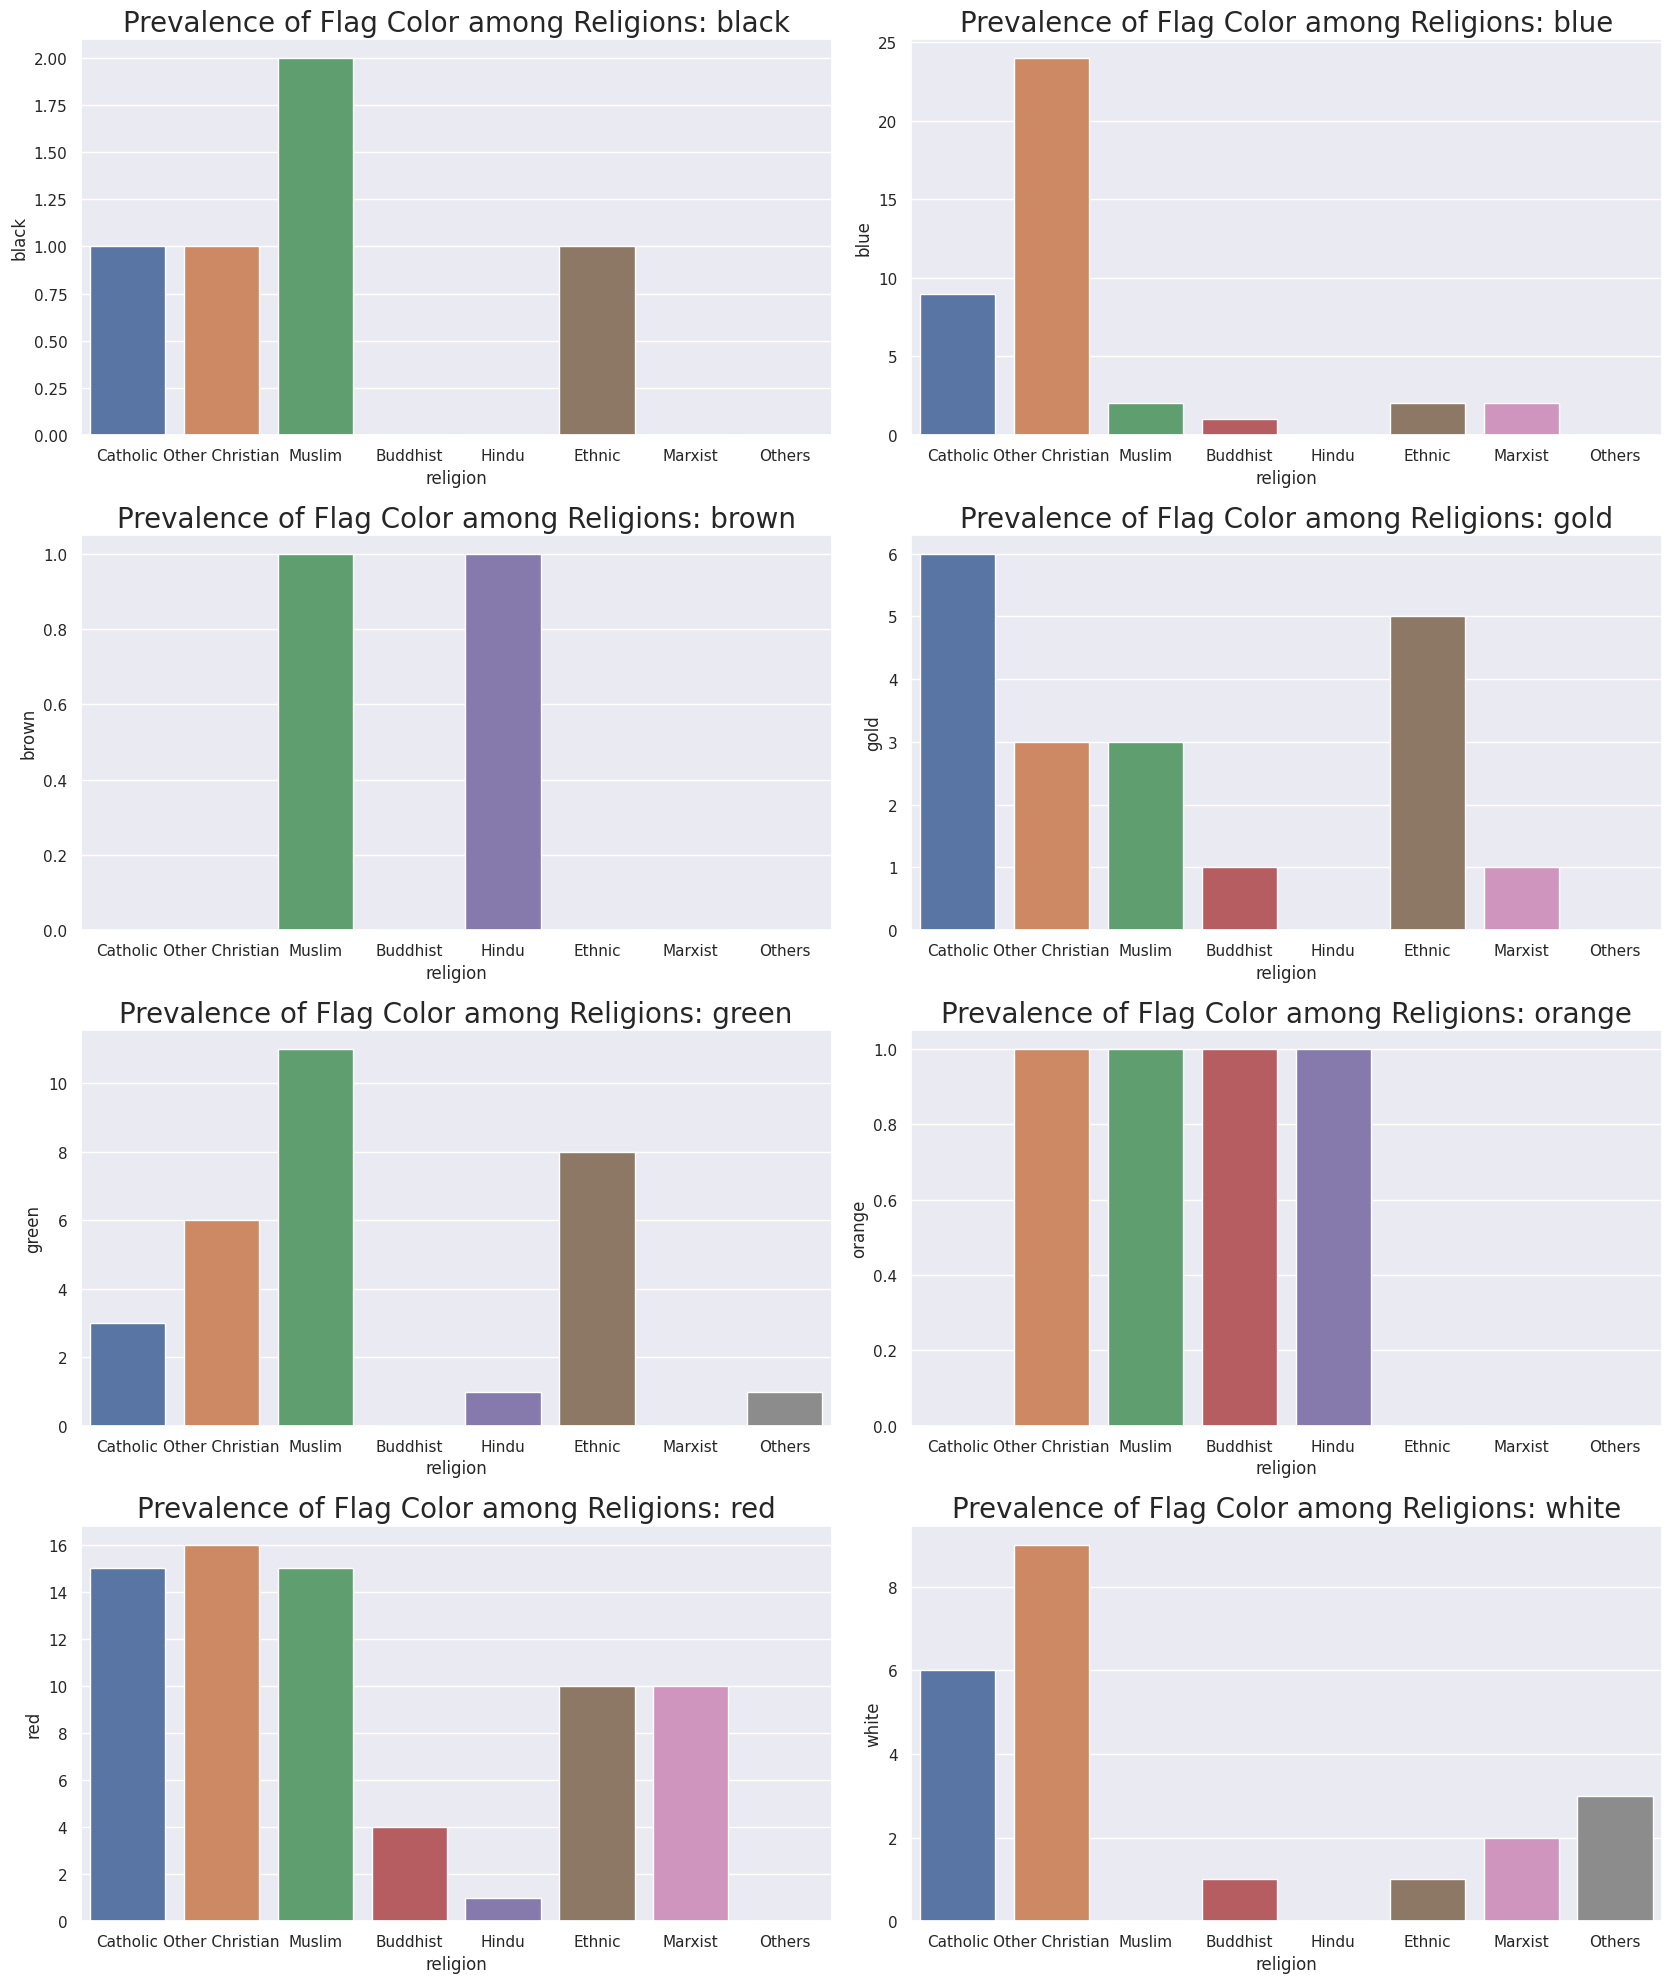

In [14]:
draw_graphs(group_by_flag_color, 'Prevalence of Flag Color among Religions:')

In [15]:
population_in_religions = df[['religion', 'population']].groupby('religion').sum()

population_in_religions.index = population_in_religions.index.map(religion_dict)

In [16]:
population_in_religions

,population
religion,
Catholic,607
Other Christian,524
Muslim,685
Buddhist,132
Hindu,702
Ethnic,175
Marxist,1510
Others,163


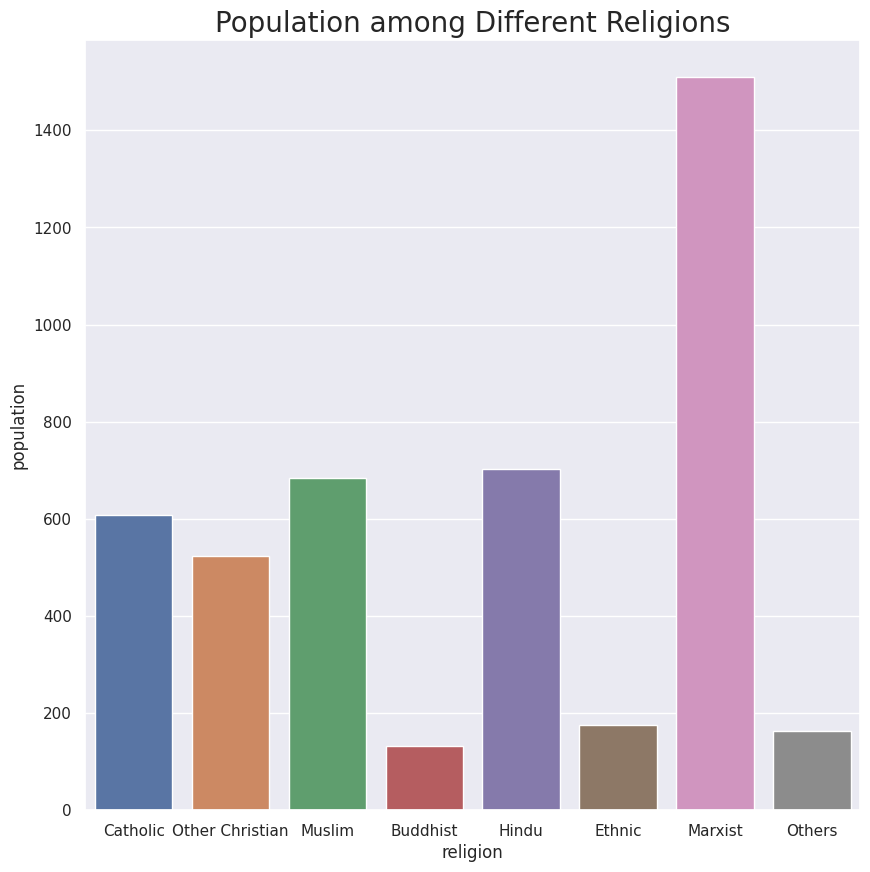

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(data=population_in_religions, y='population', x=population_in_religions.index).set_title('Population among Different Religions').set_fontsize(20)

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Нормализацию данных выполнил выше, чем было задано, чтобы не нарушать последовательность обработки данных и не делать дополнительные копии данных. Нормализация по методу минимакс, нормализованные колонки: country_area, population

In [18]:
def normalize (dt, strg, dt_min, dt_max):
  return (dt[strg] - dt_min) / (dt_max - dt_min)

In [19]:
df_norm_cols = ['country_area', 'population']

In [20]:
for name_ in df_norm_cols:
  df[name_ + '_norm'] = df.apply(normalize, strg=name_, dt_min = df[name_].min(),  dt_max = df[name_].max(), axis=1)

In [21]:
X_data = df.drop(['religion', 'country_name', 'country_area', 'population'], axis=1)

X_data['landmass'] = X_data['landmass'].map(landmass_dict)

In [22]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   landmass           193 non-null    object 
 1   geo_zone           193 non-null    int64  
 2   language           193 non-null    int64  
 3   vert_bars          193 non-null    int64  
 4   horiz_stripes      193 non-null    int64  
 5   num_of_colors      193 non-null    int64  
 6   red                193 non-null    int64  
 7   green              193 non-null    int64  
 8   blue               193 non-null    int64  
 9   gold               193 non-null    int64  
 10  white              193 non-null    int64  
 11  black              193 non-null    int64  
 12  orange             193 non-null    int64  
 13  mainhue            193 non-null    object 
 14  circles            193 non-null    int64  
 15  crosses            193 non-null    int64  
 16  saltires           193 non

In [23]:
X_data = pd.get_dummies(X_data, columns=['landmass', 'topleft', 'botright', 'mainhue'], dtype=int)

In [24]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geo_zone            193 non-null    int64  
 1   language            193 non-null    int64  
 2   vert_bars           193 non-null    int64  
 3   horiz_stripes       193 non-null    int64  
 4   num_of_colors       193 non-null    int64  
 5   red                 193 non-null    int64  
 6   green               193 non-null    int64  
 7   blue                193 non-null    int64  
 8   gold                193 non-null    int64  
 9   white               193 non-null    int64  
 10  black               193 non-null    int64  
 11  orange              193 non-null    int64  
 12  circles             193 non-null    int64  
 13  crosses             193 non-null    int64  
 14  saltires            193 non-null    int64  
 15  quarters            193 non-null    int64  
 16  sunstars

In [25]:
X_data.head()

,geo_zone,language,vert_bars,horiz_stripes,num_of_colors,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,country_area_norm,population_norm,landmass_Africa,landmass_Asia,landmass_Europe,landmass_N_America,landmass_Oceania,landmass_S_America,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white
0,1,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0.001295,0.002976,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,8,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0.106598,0.019841,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0.000000,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,1,6,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2,10,0,2,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0.055665,0.006944,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
y_data = df['religion']

y_data.head()

0    6
1    2
2    1
3    0
4    5
Name: religion, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2, random_state=42)

Обучите любую модель классификации на выбор.

In [28]:
rfc = RandomForestClassifier(random_state=42,min_samples_leaf=3)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
rfc_pred

array([1, 0, 0, 5, 0, 1, 0, 1, 1, 1, 2, 1, 1, 5, 2, 0, 5, 1, 0, 0, 1, 0,
       1, 5, 1, 1, 2, 1, 1, 5, 2, 6, 2, 2, 1, 1, 0, 1, 2])

Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.

In [32]:
print(c_rep(y_test, rfc_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.88      0.88      0.88        17
           2       0.57      0.80      0.67         5
           3       1.00      0.00      0.00         2
           5       0.60      1.00      0.75         3
           6       0.00      0.00      0.00         3

    accuracy                           0.72        39
   macro avg       0.62      0.56      0.49        39
weighted avg       0.71      0.72      0.68        39



In [33]:
rfc_score = rfc.score(X_test, y_test)

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [34]:
X_data_corr = df.drop(['country_name', 'mainhue', 'topleft', 'botright'], axis=1)

<Figure size 640x480 with 0 Axes>

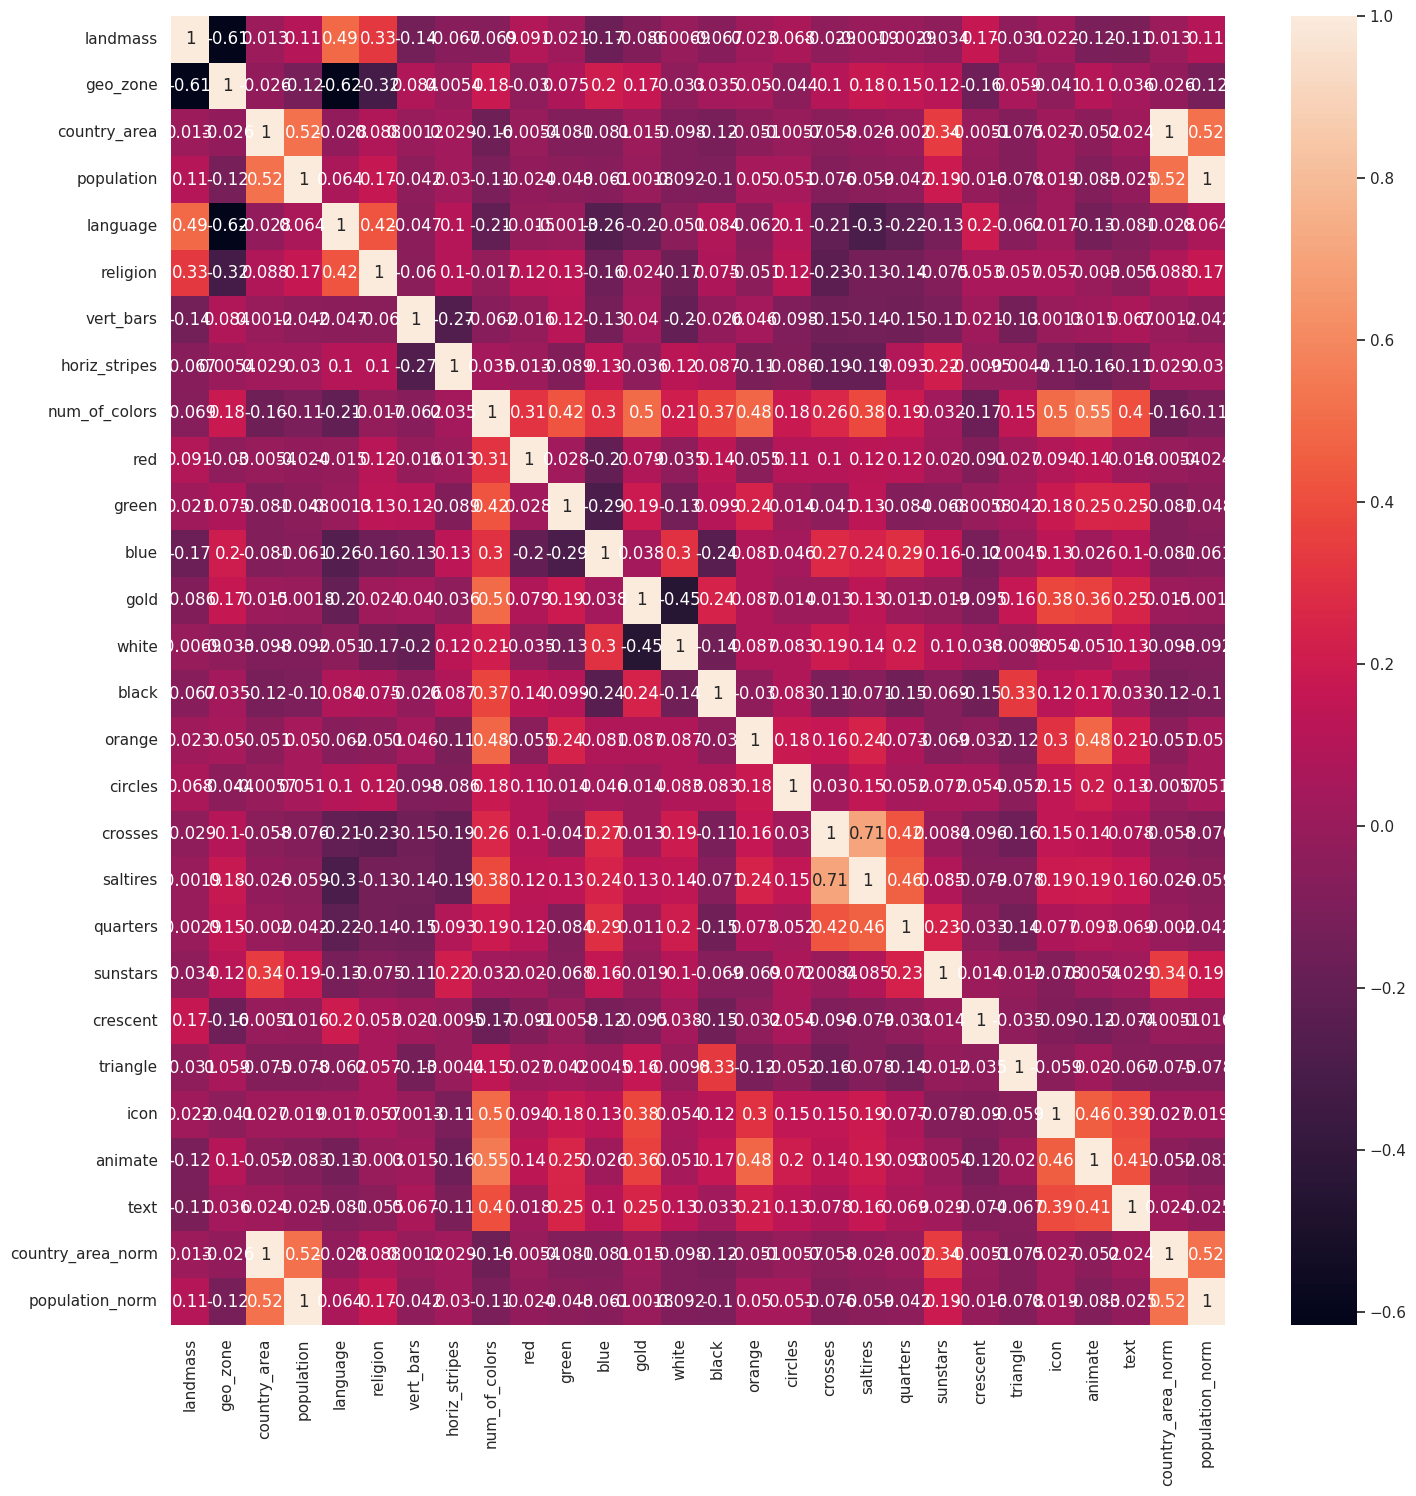

In [35]:
plt.tight_layout()
plt.figure(figsize=(17,17))
sns.heatmap(X_data_corr.corr(), annot=True)
plt.show()

Обработайте выбросы в данных.
a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.
b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

In [36]:
def draw_outliers(df: pd.core.frame.DataFrame):
  sns.set_theme()
  plt.tight_layout()
  num_title = 0
  if(len(df.columns)%2):
    len_cols = int((len(df.columns) + 1) // 2) 
  else:
    len_cols = int(len(df.columns) // 2)

  fig, ax = plt.subplots(nrows=len_cols, ncols=2, figsize=(20,65))
  for i in range(len_cols):
    for k in range(2):
      try:
        sns.boxplot(ax=ax[i, k], x=df[df.columns[num_title]], y=df.index)
        num_title+=1
      except:
        return

In [37]:
outliers_df = df.copy()
outliers_df = outliers_df.drop(['country_name', 'country_area', 'geo_zone', 'population', 'country_area_norm', 'population_norm'], axis=1)
outliers_df['religion'] = outliers_df['religion'].map(religion_dict)
outliers_df['landmass'] = outliers_df['landmass'].map(landmass_dict)
outliers_df['language'] = outliers_df['language'].map(language_dict)

<Figure size 640x480 with 0 Axes>

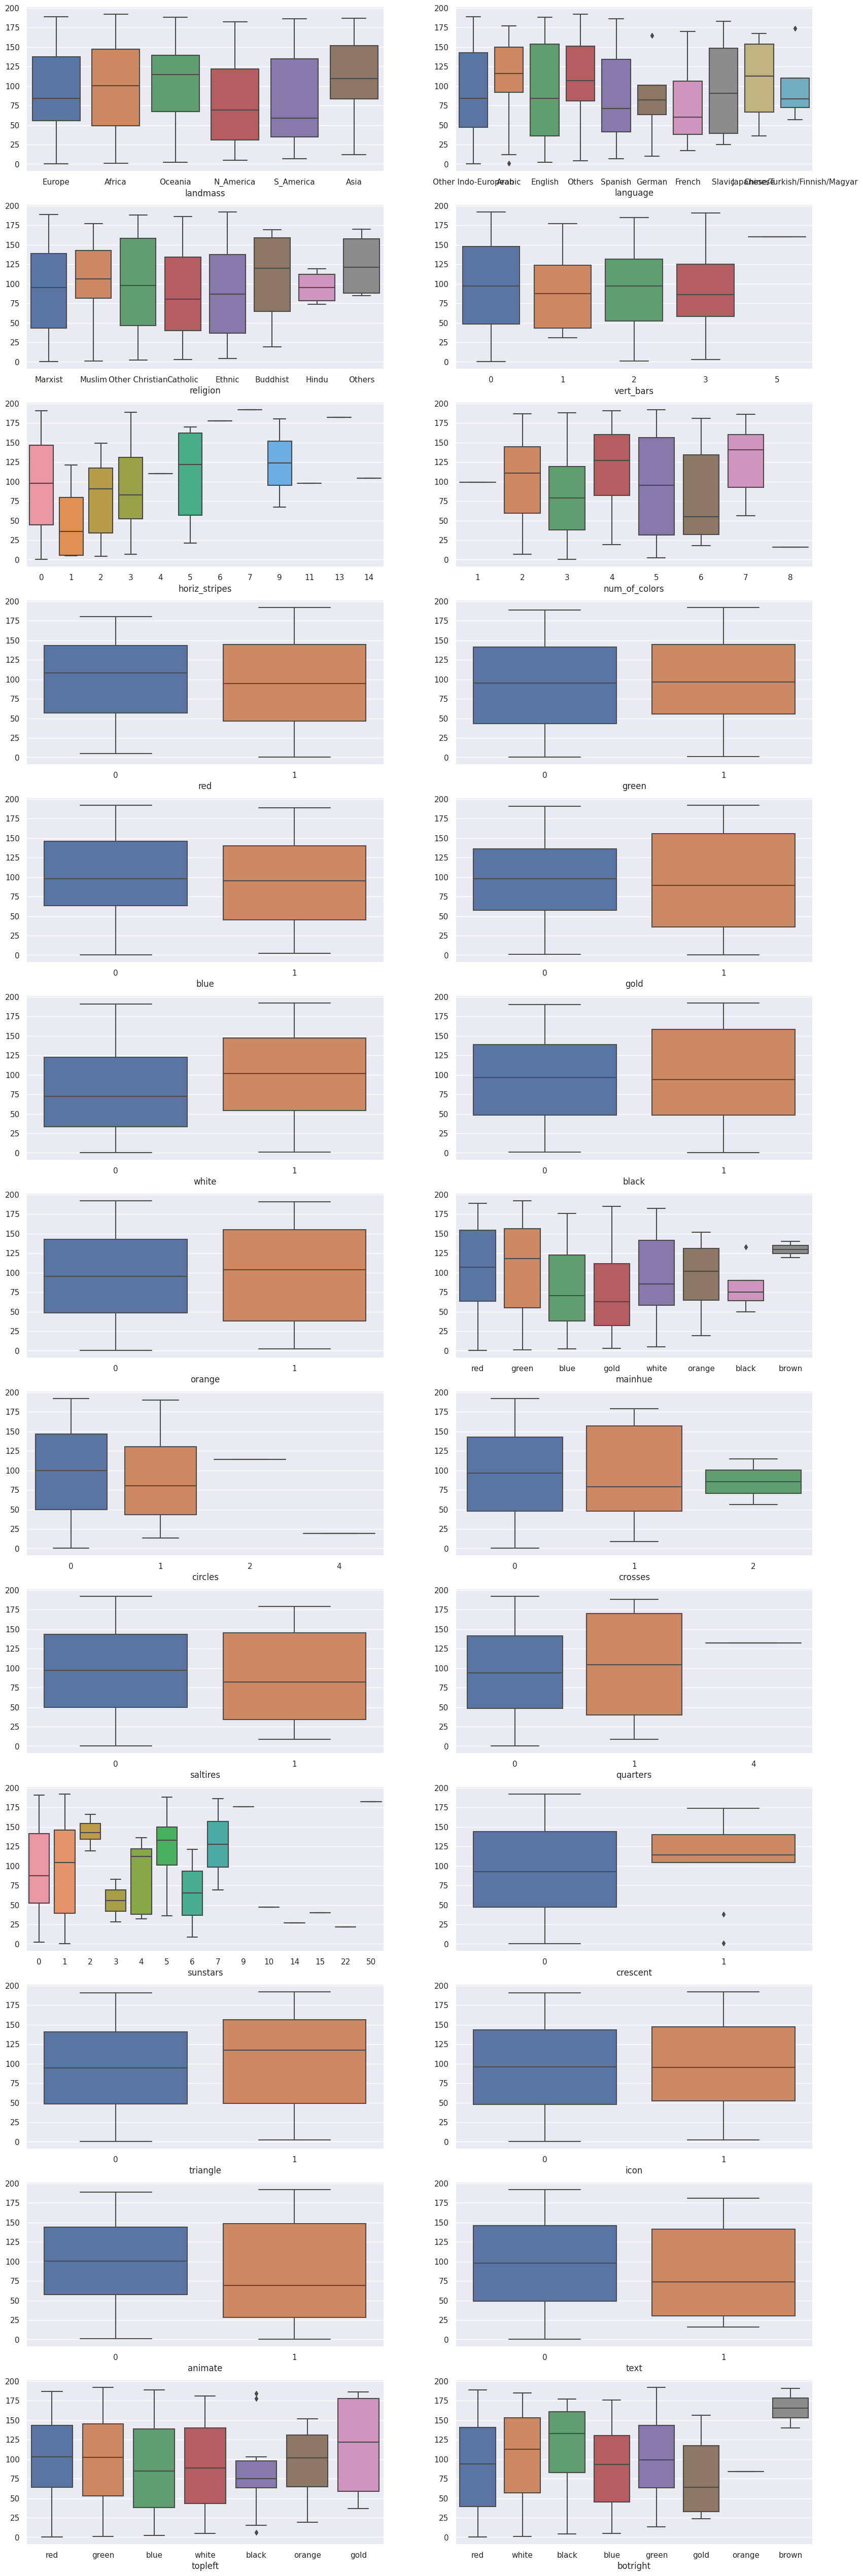

In [38]:
draw_outliers(outliers_df)

Как видно из графиков выше, существенного количества выбросов в данных не отмечается. С целью обучения применю на данных OneClassSVM для очистки от выбросов

In [39]:
oc_svm = OneClassSVM(nu=.05)

Применяю OneClassSVM только на тренировочных данных (имитируя реальную ситуацию, когда имеются "проверенные" тренировочные данные и "непроверенные" тестовые данные)

In [40]:
oc_svm.fit(X_train, y_train)

OneClassSVM(nu=0.05)

In [41]:
print(len(X_train), len(y_train))

154 154


In [42]:
oc_svm_pred = oc_svm.predict(X_train)

In [43]:
oc_svm_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [44]:
X_train_no_outliers = X_train.loc[oc_svm_pred == 1]
y_train_no_outliers = y_train.loc[oc_svm_pred == 1]

In [45]:
print(len(X_train_no_outliers), len(y_train_no_outliers))

147 147


Сбалансируйте классы путем oversampling/undersampling.
a) Повторите п. 4, п. 5.

In [46]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train_no_outliers, y_train_no_outliers)

In [47]:
rfc1 = RandomForestClassifier(random_state=42,min_samples_leaf=3)

rfc1.fit(X_train_ros, y_train_ros)

rfc1_pred_ros = rfc1.predict(X_test)

print(c_rep(y_test, rfc1_pred_ros, zero_division=1))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.88      0.82      0.85        17
           2       0.60      0.60      0.60         5
           3       0.33      0.50      0.40         2
           5       0.60      1.00      0.75         3
           6       1.00      0.00      0.00         3

    accuracy                           0.69        39
   macro avg       0.67      0.60      0.54        39
weighted avg       0.74      0.69      0.67        39



In [48]:
rfc1_score = rfc1.score(X_test, y_test)
rfc1_score

0.6923076923076923

In [49]:
smote = SMOTE(random_state=42, k_neighbors=3) 
X_train_smote, y_train_smote= smote.fit_resample(X_train_no_outliers, y_train_no_outliers)

In [50]:
rfc2 = RandomForestClassifier(random_state=42,min_samples_leaf=3)

rfc2.fit(X_train_smote, y_train_smote)

rfc2_pred_smote = rfc2.predict(X_test)

print(c_rep(y_test, rfc2_pred_smote, zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.88      0.82      0.85        17
           2       0.60      0.60      0.60         5
           3       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         3
           6       0.33      0.33      0.33         3

    accuracy                           0.67        39
   macro avg       0.50      0.55      0.51        39
weighted avg       0.69      0.67      0.67        39



In [51]:
rfc2_score = rfc2.score(X_test, y_test)
rfc2_score

0.6666666666666666

In [52]:
rus = RandomUnderSampler(random_state=42) 
X_train_rus, y_train_rus= rus.fit_resample(X_train_no_outliers, y_train_no_outliers)

In [53]:
rfc3 = RandomForestClassifier(random_state=42,min_samples_leaf=3)
rfc3.fit(X_train_rus, y_train_rus)

rfc3_pred_smote = rfc3.predict(X_test)

print(c_rep(y_test, rfc3_pred_smote, zero_division=1))

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.69      0.65      0.67        17
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      1.00      0.00         0
           5       0.50      0.67      0.57         3
           6       0.25      0.33      0.29         3
           7       0.00      1.00      0.00         0

    accuracy                           0.44        39
   macro avg       0.23      0.50      0.24        39
weighted avg       0.46      0.44      0.44        39



In [54]:
rfc3_score = rfc3.score(X_test, y_test)
rfc3_score

0.4358974358974359

Уменьшите размерность пространства признаков.
a) Повторите п. 4, п. 5.

In [55]:
rf_dataframe = pd.DataFrame([X_train_no_outliers.columns, rfc.feature_importances_], ['Параметры', 'Важность']).T
rf_dataframe.sort_values('Важность', ascending=False, inplace=True)

In [56]:
len(rf_dataframe)

53

<Figure size 640x480 with 0 Axes>

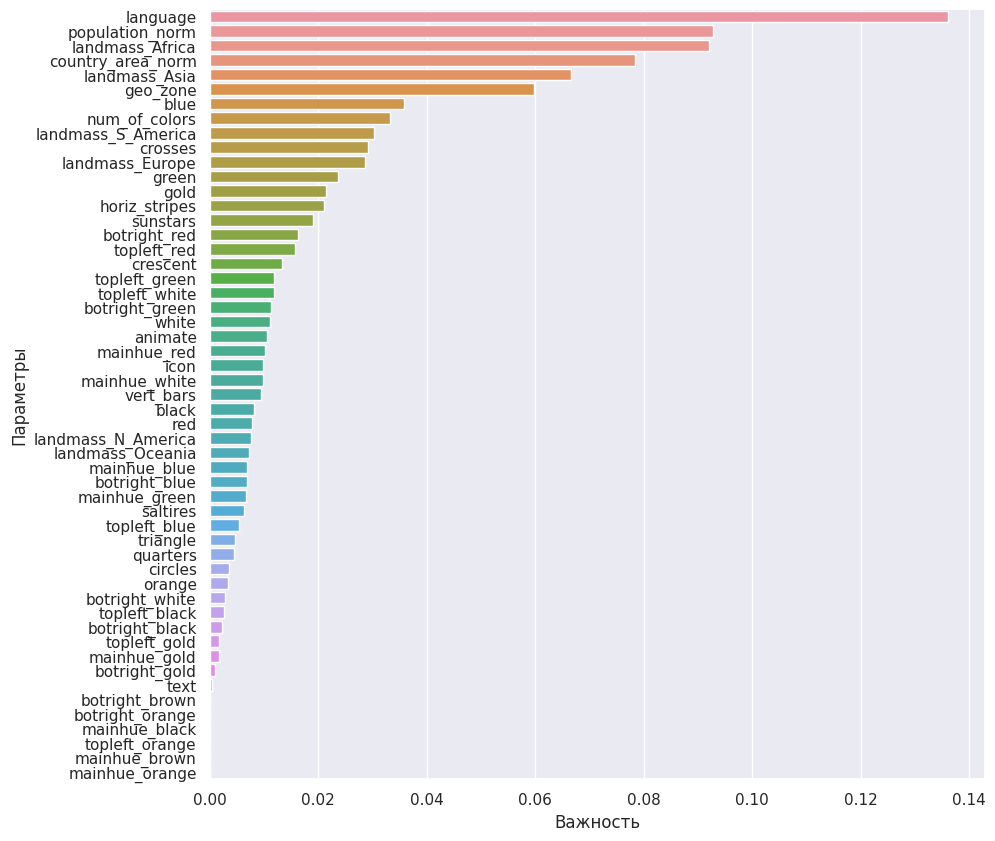

In [57]:
plt.tight_layout()
plt.figure(figsize=(10,10))
sns.barplot(data=rf_dataframe, y='Параметры', x='Важность', orient='horizontal');

Если общее кол-во признаков - 53, важность шести нижних признаков равна 0, а следующие снизу вверх признаки имеют очень незначительную важность, то могу предположить, что размерность можно сжать до 53 - 12 = 41 

In [59]:
pca = PCA(n_components = 41)
pca.fit(X_train_no_outliers, y_train_no_outliers)
X_data_pca_train = pca.transform(X_train_no_outliers)
X_data_pca_test = pca.transform(X_test)
data_pca = pd.DataFrame(X_data_pca_train)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,-1.065619,-1.310264,1.021037,-0.494276,1.270337,0.277095,-0.305692,-0.077080,0.634681,-0.453903,0.635620,-0.630980,0.739075,-0.465675,-0.812606,0.112130,0.007143,0.400457,-0.562926,-0.052906,0.493912,0.235618,-0.047633,-0.265280,0.125829,0.183191,-0.060598,-0.351183,0.251962,-0.231920,-0.134567,0.195487,0.355732,-0.451502,-0.346852,-0.068780,0.222967,0.004252,0.003075,0.015969,0.106044
1,-2.119948,0.494752,-1.378464,-0.788213,-2.523625,-0.670194,-1.643817,1.059936,-0.767883,0.165598,0.650028,-0.326942,0.209223,0.296139,0.001135,-0.178573,0.187441,-0.261977,0.191841,0.000991,0.076769,-0.161114,0.066029,-0.097446,-0.045607,-0.679981,0.228888,0.125328,0.089756,-0.027615,-0.102187,-0.000956,0.268307,-0.197107,0.355538,-0.162512,-0.070453,-0.056185,-0.049341,-0.060456,-0.134585
2,-4.257094,-1.534544,3.807571,3.524314,-0.634602,-0.405817,1.459731,-0.001277,-0.608555,-0.279417,-0.295740,0.371589,-0.350917,0.086867,0.263369,0.144909,-0.087928,-0.076663,0.120775,0.197645,0.143272,0.300687,0.470654,-0.238140,-0.793529,-0.049972,0.649931,0.188785,0.091500,-0.205985,-0.188786,0.076585,-0.088620,-0.077919,-0.104722,0.116035,-0.034290,-0.064122,0.012382,-0.219067,-0.053990
3,3.566159,-0.580412,0.594343,-1.068024,0.181825,-0.480372,0.189005,-0.857499,0.224488,-0.318167,0.835250,-0.126644,-0.134456,-0.512574,0.445338,0.936786,0.326259,0.015285,0.227910,0.377881,0.050931,-0.100094,0.203349,-0.289349,0.024113,0.102013,-0.105599,-0.192598,-0.060467,-0.135013,-0.074726,0.015092,0.117270,0.201920,-0.051640,0.002236,-0.085852,-0.102258,0.087750,-0.028077,-0.030025
4,-3.978129,3.944907,-0.054756,0.797384,0.050674,-0.529669,0.939402,-0.348656,-1.122120,-0.202332,0.689160,0.859104,-0.184372,-0.250184,0.721677,-0.123295,-0.069980,0.293349,-0.061134,-0.666065,0.367691,-0.566488,-0.233491,0.112692,-0.100414,0.019230,0.287225,-0.223018,0.083617,0.087657,0.359583,0.196034,-0.003198,-0.128699,0.075903,0.072862,-0.069097,-0.037018,-0.018096,0.001696,0.017581


In [60]:
rfc4 = RandomForestClassifier(random_state=42, min_samples_leaf=3)
rfc4.fit(X_data_pca_train, y_train_no_outliers)
rfc4_pred = rfc4.predict(X_data_pca_test)

In [61]:
print(c_rep(y_test, rfc4_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.76      0.94      0.84        17
           2       0.57      0.80      0.67         5
           3       1.00      0.00      0.00         2
           5       0.67      0.67      0.67         3
           6       1.00      0.00      0.00         3

    accuracy                           0.72        39
   macro avg       0.79      0.51      0.48        39
weighted avg       0.76      0.72      0.67        39



In [62]:
rfc4_score = rfc4.score(X_data_pca_test, y_test)
rfc4_score

0.717948717948718

Оптимизируйте параметры модели из п. 4.
a) Повторите п. 4, п. 5.

In [63]:
rfc5 = RandomForestClassifier(random_state=42, n_estimators=150,
                                  max_depth=6,
                                  max_samples=0.5,
                                  max_features=0.5)
rfc5.fit(X_train_no_outliers, y_train_no_outliers)
rfc5_pred = rfc5.predict(X_test)
print(c_rep(y_test, rfc5_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.88      0.88      0.88        17
           2       0.57      0.80      0.67         5
           3       0.00      0.00      0.00         2
           5       0.75      1.00      0.86         3
           6       0.50      0.33      0.40         3

    accuracy                           0.77        39
   macro avg       0.60      0.63      0.60        39
weighted avg       0.76      0.77      0.76        39



In [64]:
rfc5_score = rfc5.score(X_test, y_test)
rfc5_score

0.7692307692307693

Примените любой метод на ваше усмотрение для отбора признаков.
a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.

Отбор признаков - с помощью feature_importances_ (см.таблицу выше) - убрал признаки с нулевыми значениями важности:

In [65]:
X_train_dropped = X_train_no_outliers.drop(['botright_brown', 'botright_orange', 'mainhue_black', 'topleft_orange', 'mainhue_brown', 'mainhue_orange'], axis=1)
X_test_dropped = X_test.drop(['botright_brown', 'botright_orange', 'mainhue_black', 'topleft_orange', 'mainhue_brown', 'mainhue_orange'], axis=1)

In [66]:
rfc6 = RandomForestClassifier(random_state=42, n_estimators=150,
                                  max_depth=6,
                                  max_samples=0.5,
                                  max_features=0.5)
rfc6.fit(X_train_dropped, y_train_no_outliers)
rfc6_pred = rfc6.predict(X_test_dropped)
print(c_rep(y_test, rfc6_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.82      0.82      0.82        17
           2       0.67      0.80      0.73         5
           3       1.00      0.00      0.00         2
           5       0.75      1.00      0.86         3
           6       0.50      0.33      0.40         3

    accuracy                           0.74        39
   macro avg       0.74      0.62      0.59        39
weighted avg       0.75      0.74      0.72        39



In [67]:
rfc6_score = rfc6.score(X_test_dropped, y_test)
rfc6_score

0.7435897435897436

Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.

In [68]:
stacking_classifier = StackingClassifier(
    [
      ('RandomForestClassifier', RandomForestClassifier(random_state=42, n_estimators=150,
                                  max_depth=6,
                                  max_samples=0.5,
                                  max_features=0.5)),
      ('KNeighborsClassifier', KNeighborsClassifier()),
      ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42, min_samples_leaf=3))
    ],
    
      RidgeClassifierCV([14,10,8])
)

In [69]:
stacking_classifier.fit(X_train_no_outliers, y_train_no_outliers)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(estimators=[('RandomForestClassifier',
                                RandomForestClassifier(max_depth=6,
                                                       max_features=0.5,
                                                       max_samples=0.5,
                                                       n_estimators=150,
                                                       random_state=42)),
                               ('KNeighborsClassifier', KNeighborsClassifier()),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier(min_samples_leaf=3,
                                                       random_state=42))],
                   final_estimator=RidgeClassifierCV(alphas=[14, 10, 8]))

In [70]:
stacking_classifier_pred = stacking_classifier.predict(X_test)

In [71]:
print(c_rep(y_test, stacking_classifier_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        17
           2       0.50      0.80      0.62         5
           3       1.00      0.00      0.00         2
           5       0.75      1.00      0.86         3
           6       1.00      0.33      0.50         3

    accuracy                           0.77        39
   macro avg       0.82      0.63      0.61        39
weighted avg       0.81      0.77      0.75        39



In [72]:
stacking_classifier_score =  stacking_classifier.score(X_test, y_test)
stacking_classifier_score

0.7692307692307693

Выберите результат с лучшими метриками и постройте для него Confusion Matrix.

In [73]:
columns_list = ['Точность на тестовых выборках']

index_list = ['Обычный RandForClassifier', 'RFC после RandomOverSampler', 'RFC после SMOTE', 'RFC после RandomUnderSample', 
              'RFC после PCA (уменьш.простр.признаков)', 'RFC после оптимизации параметров', 'RFC после отбора признаков', 'StackingClassifier']

np_arr_results = np.array([rfc_score, rfc1_score, rfc2_score, rfc3_score, rfc4_score, rfc5_score, rfc6_score, stacking_classifier_score]).T

In [74]:
scores_table = pd.DataFrame(np_arr_results, columns=columns_list, index=index_list).sort_values('Точность на тестовых выборках', ascending=False)

In [75]:
scores_table

,Точность на тестовых выборках
RFC после оптимизации параметров,0.769231
StackingClassifier,0.769231
RFC после отбора признаков,0.743590
Обычный RandForClassifier,0.717949
RFC после PCA (уменьш.простр.признаков),0.717949
RFC после RandomOverSampler,0.692308
RFC после SMOTE,0.666667
RFC после RandomUnderSample,0.435897


In [76]:
confusion_matrix(y_test, rfc5_pred)

array([[ 7,  2,  0,  0,  0,  0],
       [ 1, 15,  1,  0,  0,  0],
       [ 0,  0,  4,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  1,  1,  0,  1]])

Выводы:


1) RandomForest является одной из наиболее точных моделей машинного обучения для предсказания целевой переменной

2) RFC после оптимизации параметров показала наилучший по точности результат среди всех примененных методик очистки данных (стекинг, отбор признаков, уменьшение пространства признаков, овер/андерсемплинг)

3) Данные о различных характеристиках флагов стран, в совокупности с данными о языке, местоположении, а также нормализованными данными о численности населения тех или иных стран позволяют достаточно точно определить религиозную принадлежность населения данных стран.

4) По барчартам можно получить интересную информацию о преобладании тех или иных религиозных конфессий на различных континентах: в Северной Америке преобладают христиане-некатолики (в основном протестанты), в Южной Америке преобладает католичество, в Европе примерно одинаковое соотношение католиков и некатолических христиан, в Африке преобладают этнические верования, в Азии преобладают мусульманство и буддизм, в Океании наиболее распространено некатолическое христианство. Также можно посмотреть, какие цвета преимущественно используются в флагах стран с теми или иными преобладающими религиями.

5) Барчарт численности населения в различных религиозных конфессиях показывает, что на момент создания данного датасета (1986г.) в выборке большинство населения составляли страны с марксистской философией (Вероятно, Китай, СССР, а также восточно-азиатские и латиноамериканские коммунистические страны). Христианство (католическое + некатолическое) является второй по распространенности религией, далее идут индуизм и мусульманство.
